In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (961529, 78)
X teste =  (412085, 78)
y multiclasse treino =  (961529,)
y multiclasse teste =  (412085,)
y binário treino =  (961529,)
y binário teste =  (412085,)


In [5]:
y_train50_binary_train.value_counts()

0    795558
1    165971
Name: Label_binary, dtype: int64

In [6]:
y_train50_multiclass_train.value_counts()

BENIGN          795558
DoS              88577
PortScan         55460
DDoS             15615
BruteForce        4833
WebAttack          779
BotNet             689
Infiltration        13
Heartbleed           5
Name: Label_multiclass, dtype: int64

In [7]:
y_train50_binary_test.value_counts()

0    340990
1     71095
Name: Label_binary, dtype: int64

In [8]:
y_train50_multiclass_test.value_counts()

BENIGN          340990
DoS              37753
PortScan         24004
DDoS              6647
BruteForce        2084
WebAttack          310
BotNet             293
Infiltration         4
Name: Label_multiclass, dtype: int64

In [9]:
X_train50_train.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
586419,24,215,2,2,46,46,23,23,23.0,0.000000,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
1295441,24,160,2,2,90,122,45,45,45.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
925705,24,60629,1,1,49,161,49,49,49.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
865489,27,84839112,6,7,342,11595,324,0,57.0,130.835775,...,3,20,9993.0,0.0,9993,9993,84700000.0,0.0,84700000,84700000
289527,27,5325819,3,1,0,0,0,0,0.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [10]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['BENIGN' 'DoS' 'DDoS' 'PortScan' 'WebAttack' 'BruteForce' 'BotNet'
 'Infiltration' 'Heartbleed']
[0 1]


In [11]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [13]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [14]:
import pickle

In [15]:
with open('df_cic_test50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [16]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1373614, 78)
y multiclasse =  (1373614,)
y binário =  (1373614,)


In [17]:
y_test50_multiclass.value_counts()

BENIGN          1136548
DoS              126330
PortScan          79464
DDoS              22262
BruteForce         6917
WebAttack          1089
BotNet              982
Infiltration         17
Heartbleed            5
Name: Label_multiclass, dtype: int64

In [18]:
y_test50_binary.value_counts()

0    1136548
1     237066
Name: Label_binary, dtype: int64

In [19]:
X_test50.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,24,154,2,2,70,102,35,35,35.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,24,60757,2,2,60,248,30,30,30.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,24,30266,1,1,56,121,56,56,56.0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,40027,1,2,0,37,0,37,0,18.5,26.162951,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
4,24,196,2,2,80,336,40,40,40.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [20]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['BENIGN' 'DoS' 'PortScan' 'DDoS' 'BotNet' 'WebAttack' 'BruteForce'
 'Heartbleed' 'Infiltration']
[0 1]


In [21]:
#X_test50.shape

In [22]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

In [23]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [25]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo LightBGM para Train e Validation - Train50

In [26]:
import lightgbm as lgb

### Predição train50 binária

In [27]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [28]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [29]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [30]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9997500515670311

### Visualização da árvore binária

In [33]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [34]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [35]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

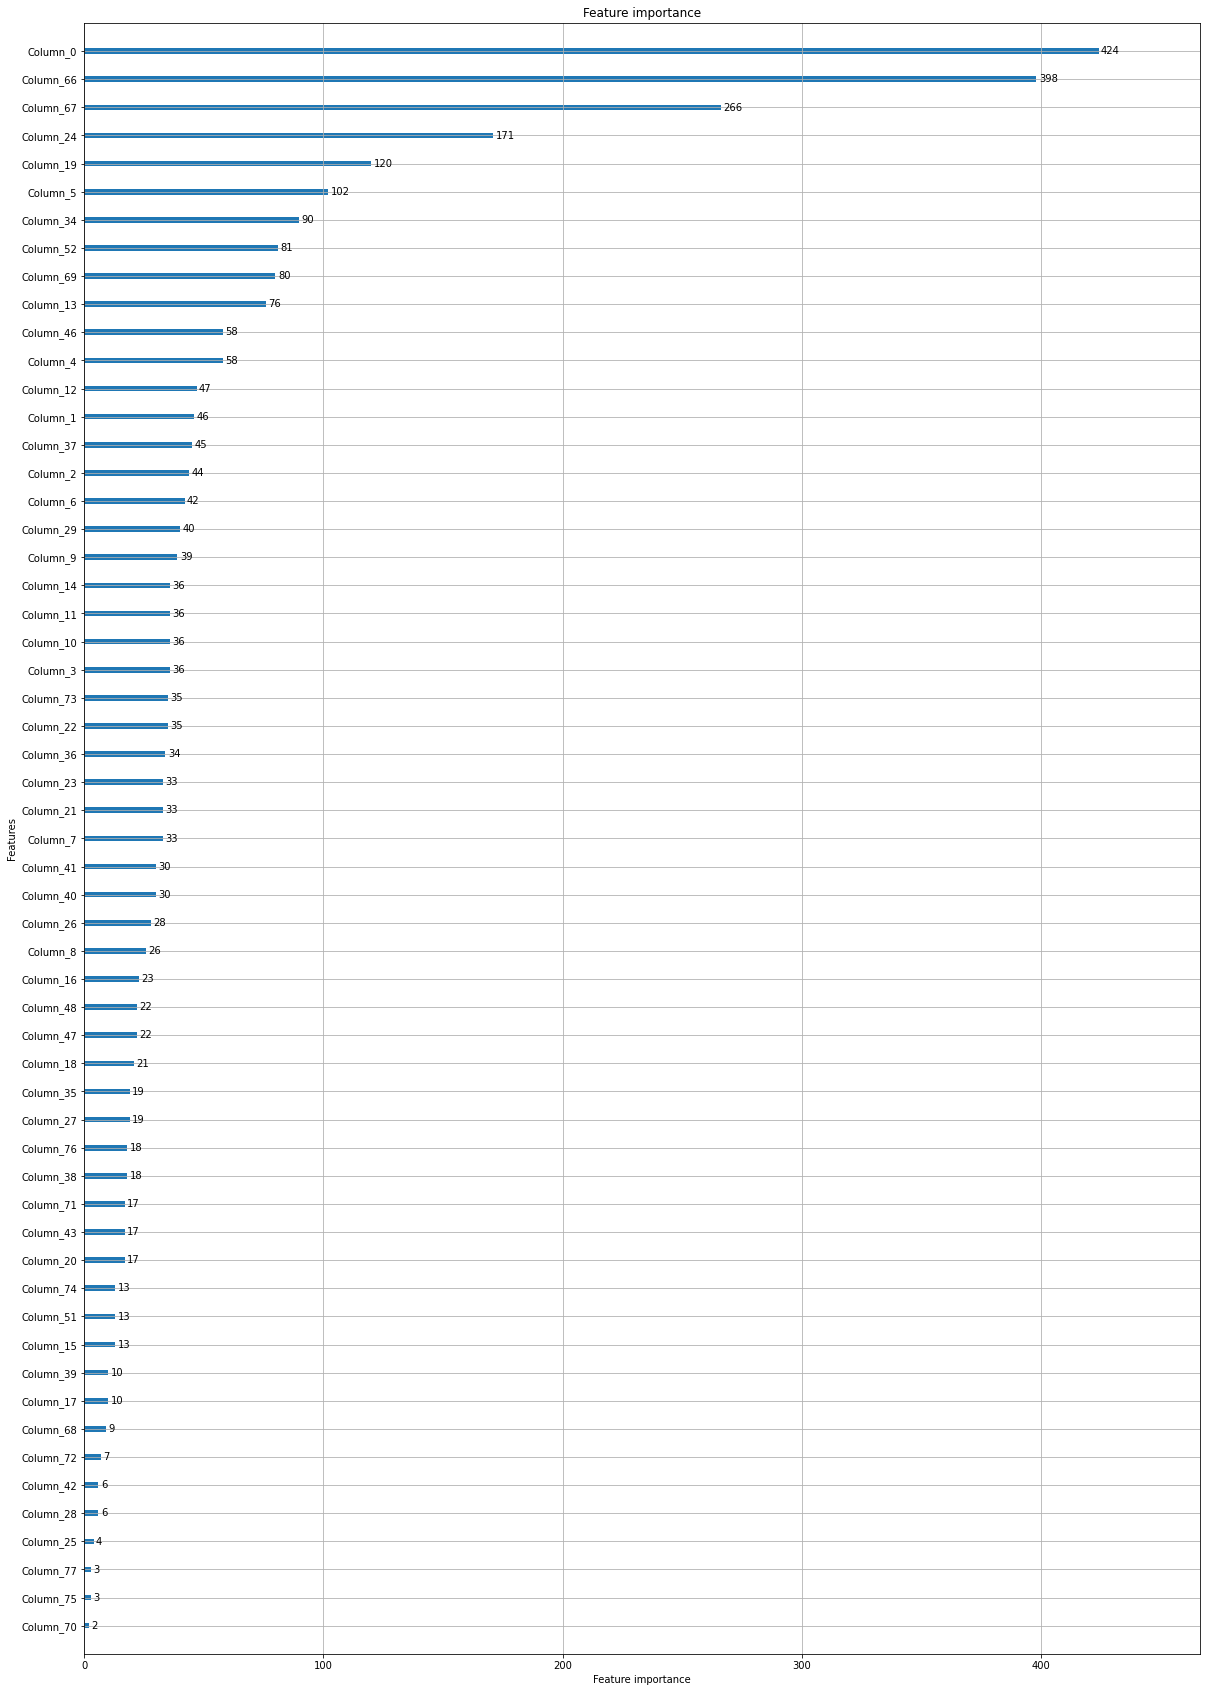

In [36]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [37]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [38]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [39]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [40]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [41]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [42]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.8104857007656188

### Visualização da árvore multiclasse

In [43]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [44]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

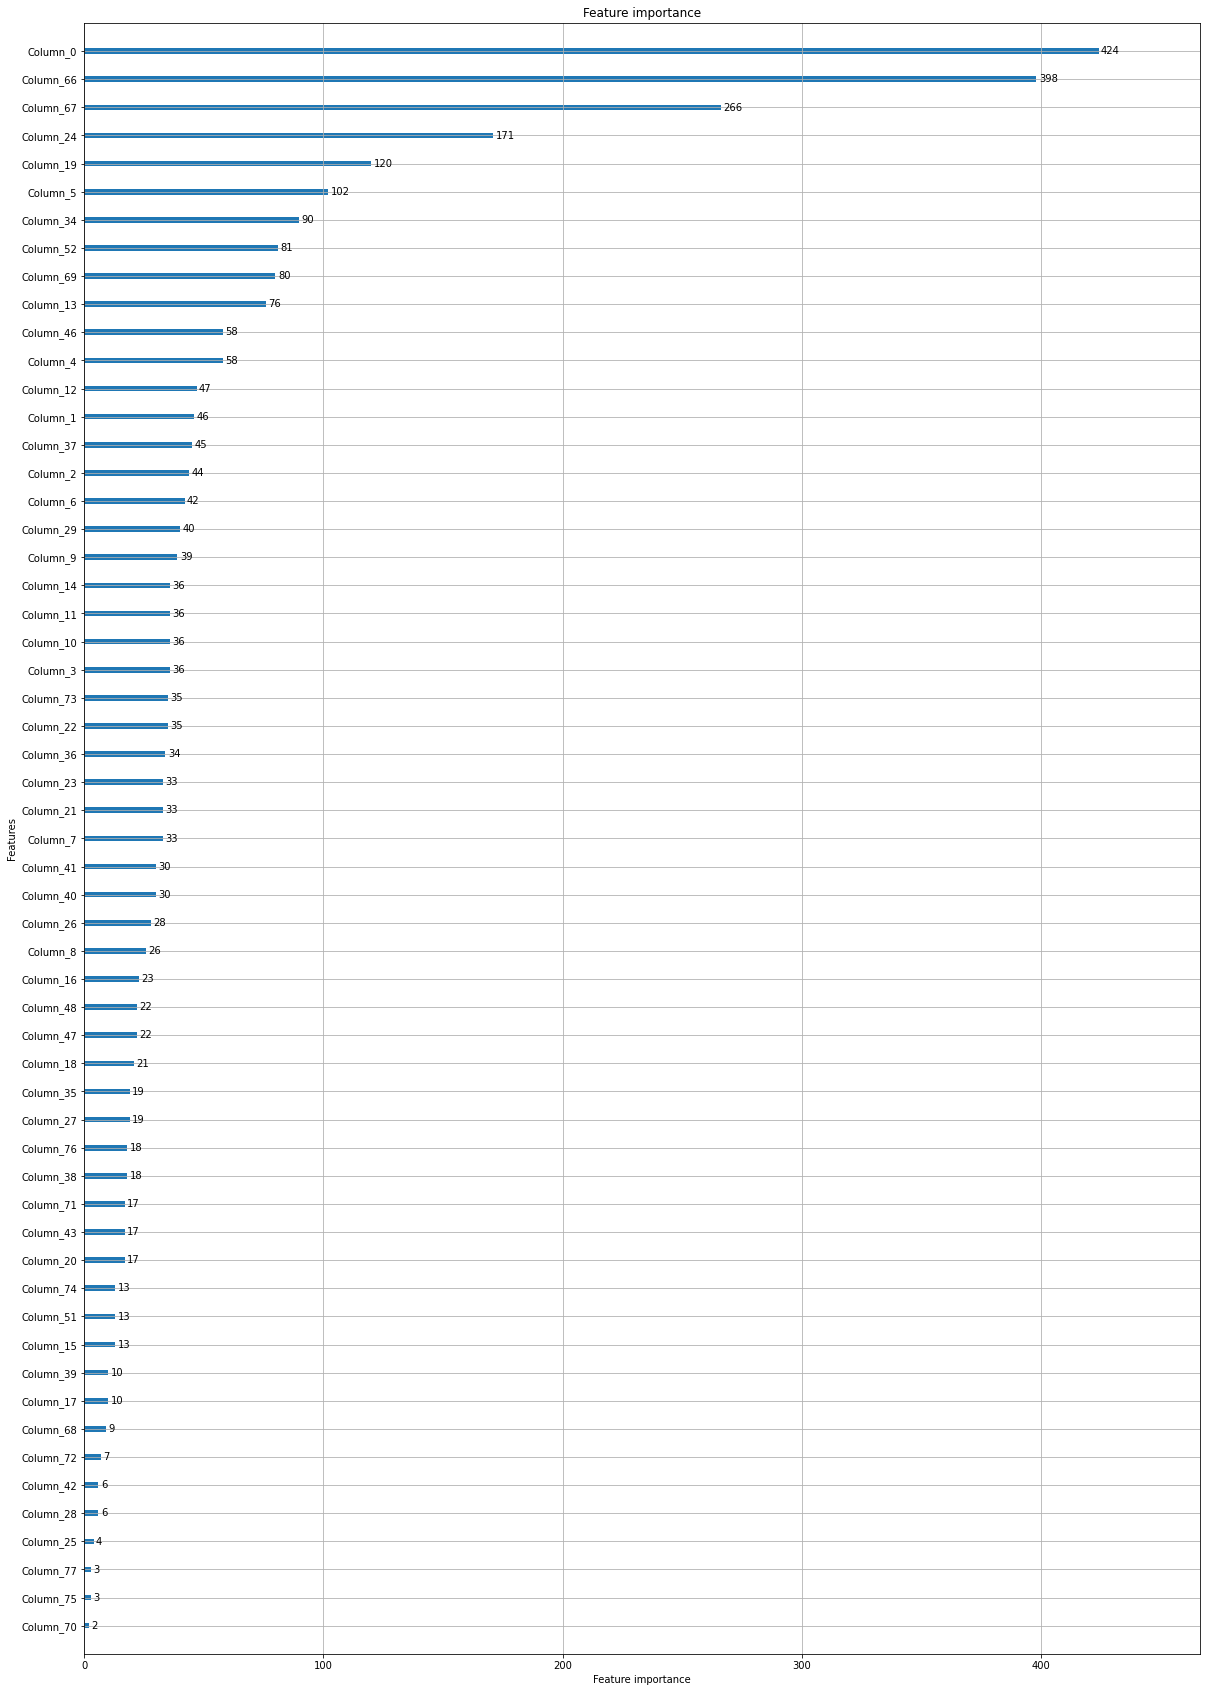

In [45]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [46]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [47]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999886  0.999812  0.999849    340990
           1   0.999100  0.999451  0.999276     71095

    accuracy                       0.999750    412085
   macro avg   0.999493  0.999632  0.999562    412085
weighted avg   0.999750  0.999750  0.999750    412085



In [48]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.828163  0.975187  0.895682    340990
      BotNet   1.000000  0.000000  0.000000       293
  BruteForce   1.000000  0.000000  0.000000      2084
        DDoS   0.053842  0.015496  0.024065      6647
         DoS   0.349451  0.035414  0.064311     37753
Infiltration   1.000000  0.000000  0.000000         4
    PortScan   0.004149  0.000833  0.001388     24004
   WebAttack   1.000000  0.000000  0.000000       310

    accuracy                       0.810486    412085
   macro avg   0.654451  0.128366  0.123181    412085
weighted avg   0.724939  0.810486  0.747515    412085



### Cross Validation do train50

In [49]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [50]:
score_cv_train50_binary

array([0.9997504 , 0.9996984 , 0.9996984 , 0.99974   , 0.9997088 ,
       0.9996984 , 0.9996256 , 0.9996568 , 0.999688  , 0.99970879])

In [51]:
cv_result_train50_binary

[0.9996973570338883]

In [52]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [53]:
score_cv_train50_multiclass

array([0.82264724, 0.96892453, 0.93670504, 0.84863707, 0.99306314,
       0.71184466, 0.81652159, 0.9659709 , 0.97441577, 0.88959148])

In [54]:
cv_result_train50_multiclass

[0.8928321420979899]

### Matriz de Confusão do train50

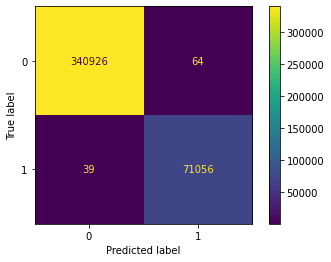

In [55]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

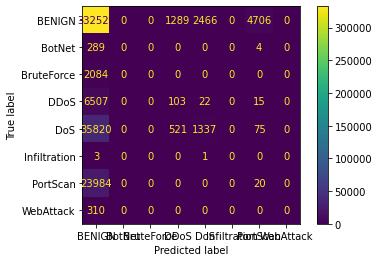

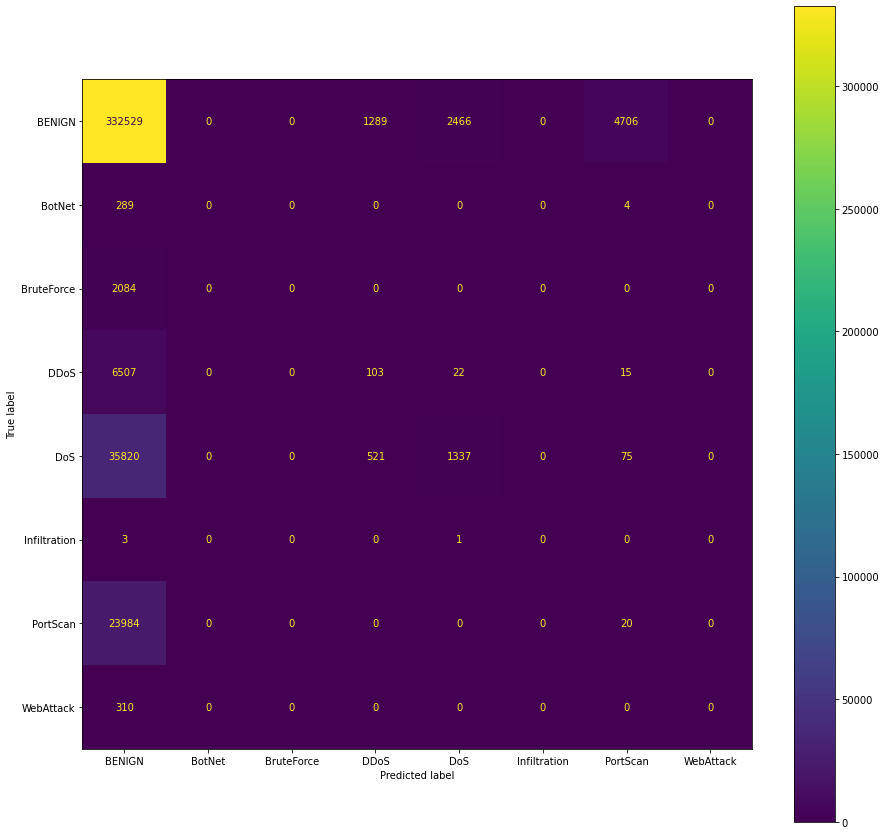

In [56]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [57]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [58]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [59]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [60]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9997684939145932

### Predição test50 multiclasse

In [61]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [62]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [63]:
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [64]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8105071730486149

### Precision e Recall do test50

In [65]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999907  0.999813  0.999860   1136548
           1   0.999106  0.999553  0.999329    237066

    accuracy                       0.999768   1373614
   macro avg   0.999506  0.999683  0.999595   1373614
weighted avg   0.999769  0.999768  0.999769   1373614



In [66]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.828094  0.975308  0.895692   1136548
      BotNet   1.000000  0.000000  0.000000       982
  BruteForce   1.000000  0.000000  0.000000      6917
        DDoS   0.054450  0.015363  0.023964     22262
         DoS   0.347133  0.035178  0.063882    126330
  Heartbleed   1.000000  0.000000  0.000000         5
Infiltration   1.000000  0.000000  0.000000        17
    PortScan   0.003389  0.000680  0.001132     79464
   WebAttack   1.000000  0.000000  0.000000      1089

    accuracy                       0.810507   1373614
   macro avg   0.692563  0.114059  0.109408   1373614
weighted avg   0.724740  0.810507  0.747438   1373614



### Matriz de Confusão do test50

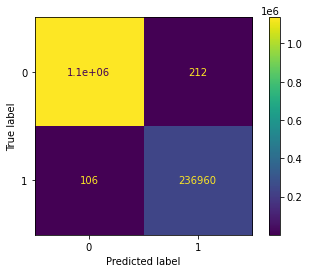

In [67]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

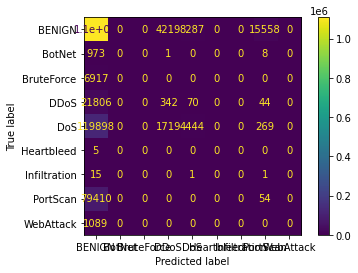

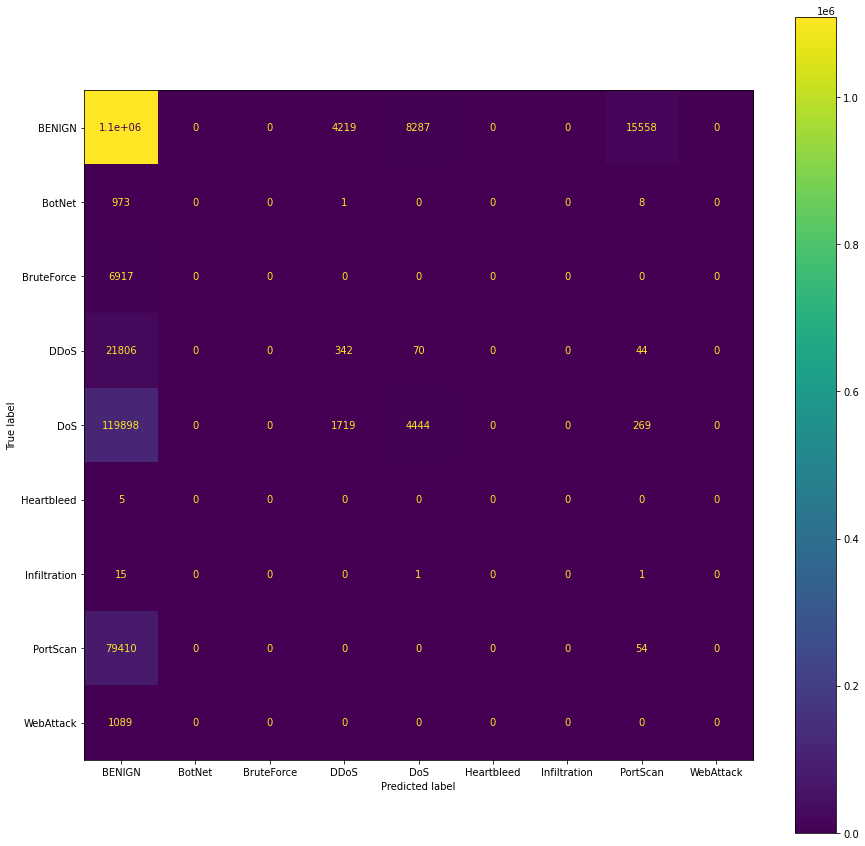

In [68]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)